# Exploratory Data Analysis (EDA)

In [21]:
#Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
dataPath = "../data/processed/pro_household_power_consumption.csv"

dataset = pd.read_csv(dataPath, index_col=0, parse_dates=True)
dataset.head(5)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2049280 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 125.1 MB


### Summary Statistics

In [24]:
def detailed_summary(df):
    summary = df.describe().T
    summary['skew'] = df.skew()
    summary['kurtosis'] = df.kurtosis()
    return summary

detailed_summary(dataset)

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
Global_active_power,2049280.0,1.091615,1.057294,0.076,0.308,0.602,1.528,11.122,1.786233,4.218685
Global_reactive_power,2049280.0,0.123714,0.112722,0.000,0.048,0.100,0.194,1.390,1.261914,2.605633
Voltage,2049280.0,240.839858,3.239987,223.200,238.990,241.010,242.890,254.150,-0.326665,0.724707
Global_intensity,2049280.0,4.627759,4.444396,0.200,1.400,2.600,6.400,48.400,1.849100,4.601243
Sub_metering_1,2049280.0,1.121923,6.153031,0.000,0.000,0.000,0.000,88.000,5.944541,35.642993
Sub_metering_2,2049280.0,1.298520,5.822026,0.000,0.000,0.000,1.000,80.000,7.090553,57.907344
Sub_metering_3,2049280.0,6.458447,8.437154,0.000,0.000,1.000,17.000,31.000,0.724688,-1.282198


### Correlation Matrix

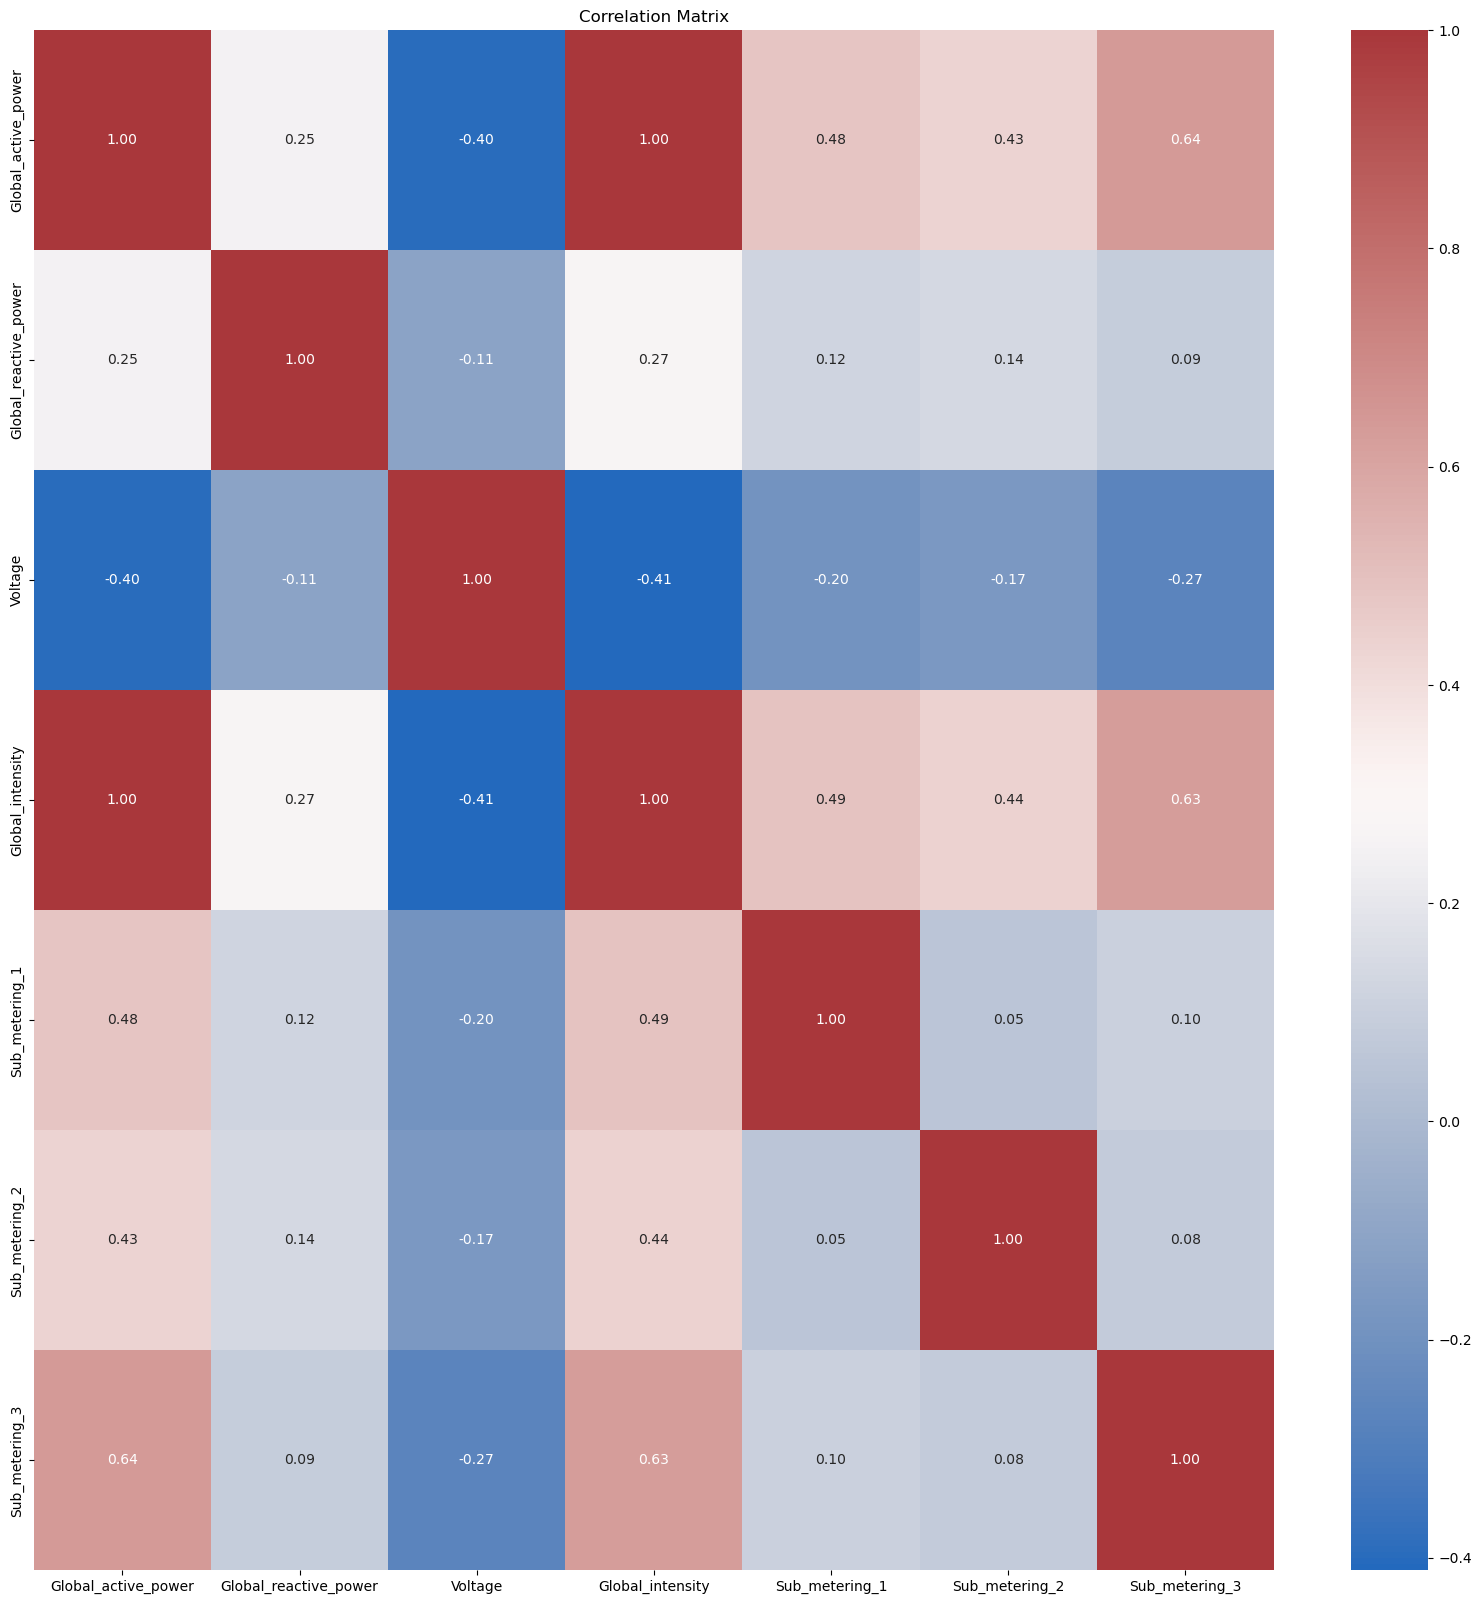

In [25]:
plt.figure(figsize=(20, 20))
sns.heatmap(dataset.corr(method='pearson'),
            annot=True,
            cmap="vlag",
            fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

### Variable distributions

The following plots show the distribution of each variable

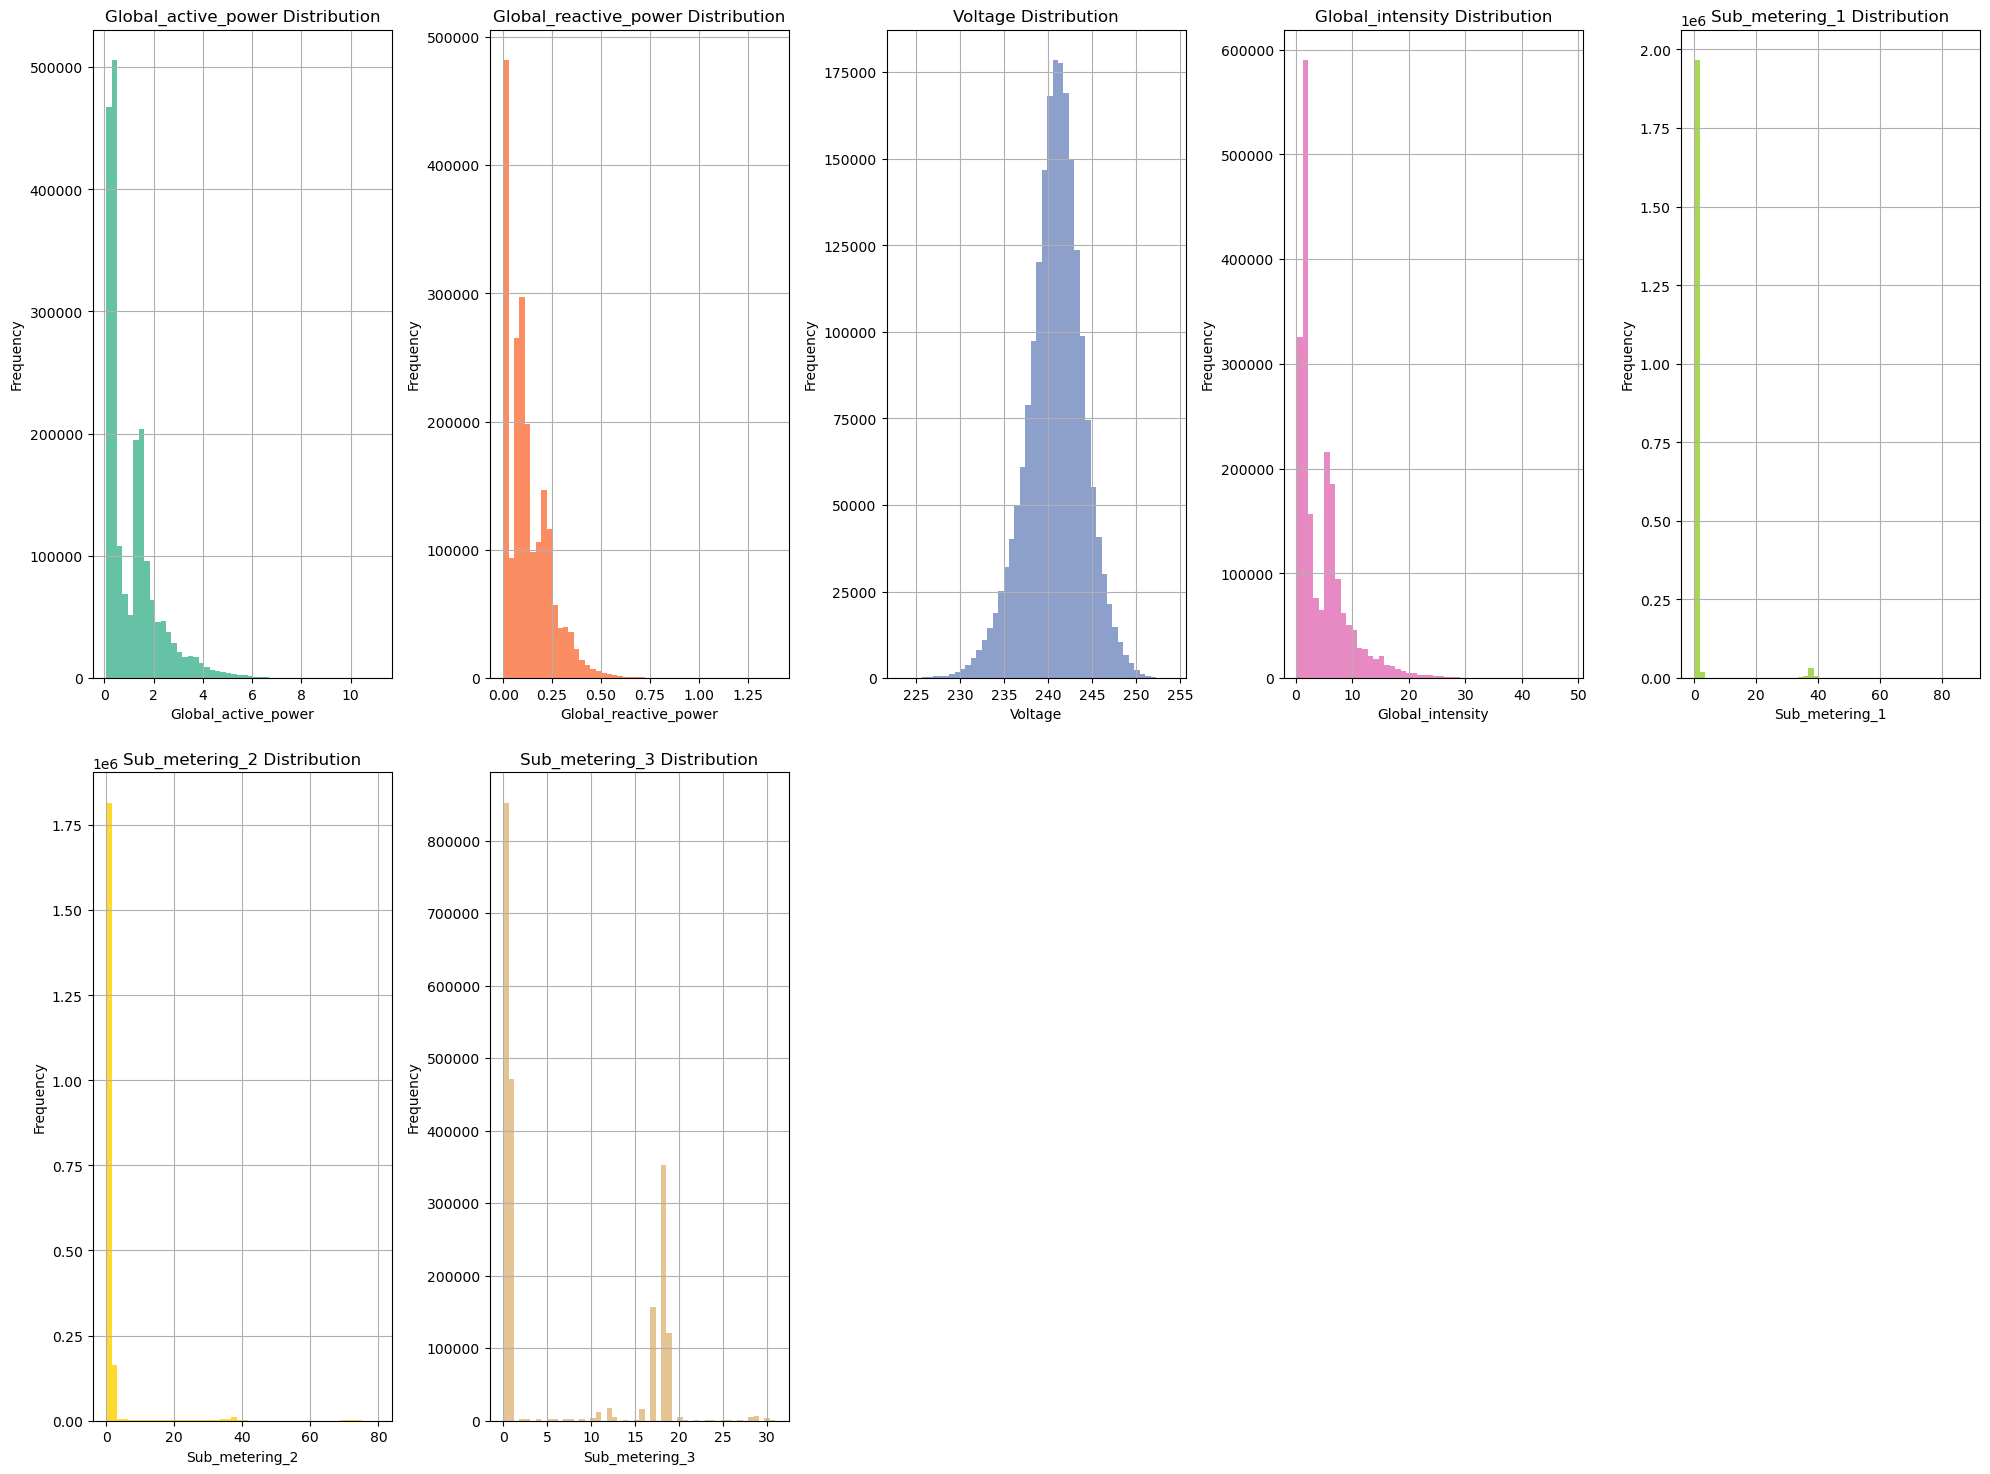

In [26]:
colors = sns.color_palette("Set2", len(dataset.columns))

plots_per_row = 5

num_rows = len(dataset.columns) // plots_per_row + (len(dataset.columns) % plots_per_row > 0)

fig, axes = plt.subplots(nrows=num_rows, ncols=plots_per_row, figsize=(20, 15))

axes = axes.flatten()

for i, (col, color) in enumerate(zip(dataset.columns, colors)):
    dataset[col].hist(bins=50, ax=axes[i], color=color)
    axes[i].set_title(f"{col} Distribution")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Resampling Dataset

In [27]:
dtemp_rhm = dataset.resample('H').mean()     # resample by hour with mean
dtemp_rdm = dataset.resample('D').mean()     # resample by day with mean
dtemp_rwm = dataset.resample('W').mean()     # resample by week with mean
dtemp_rmm = dataset.resample('M').mean()     # resample by month with mean

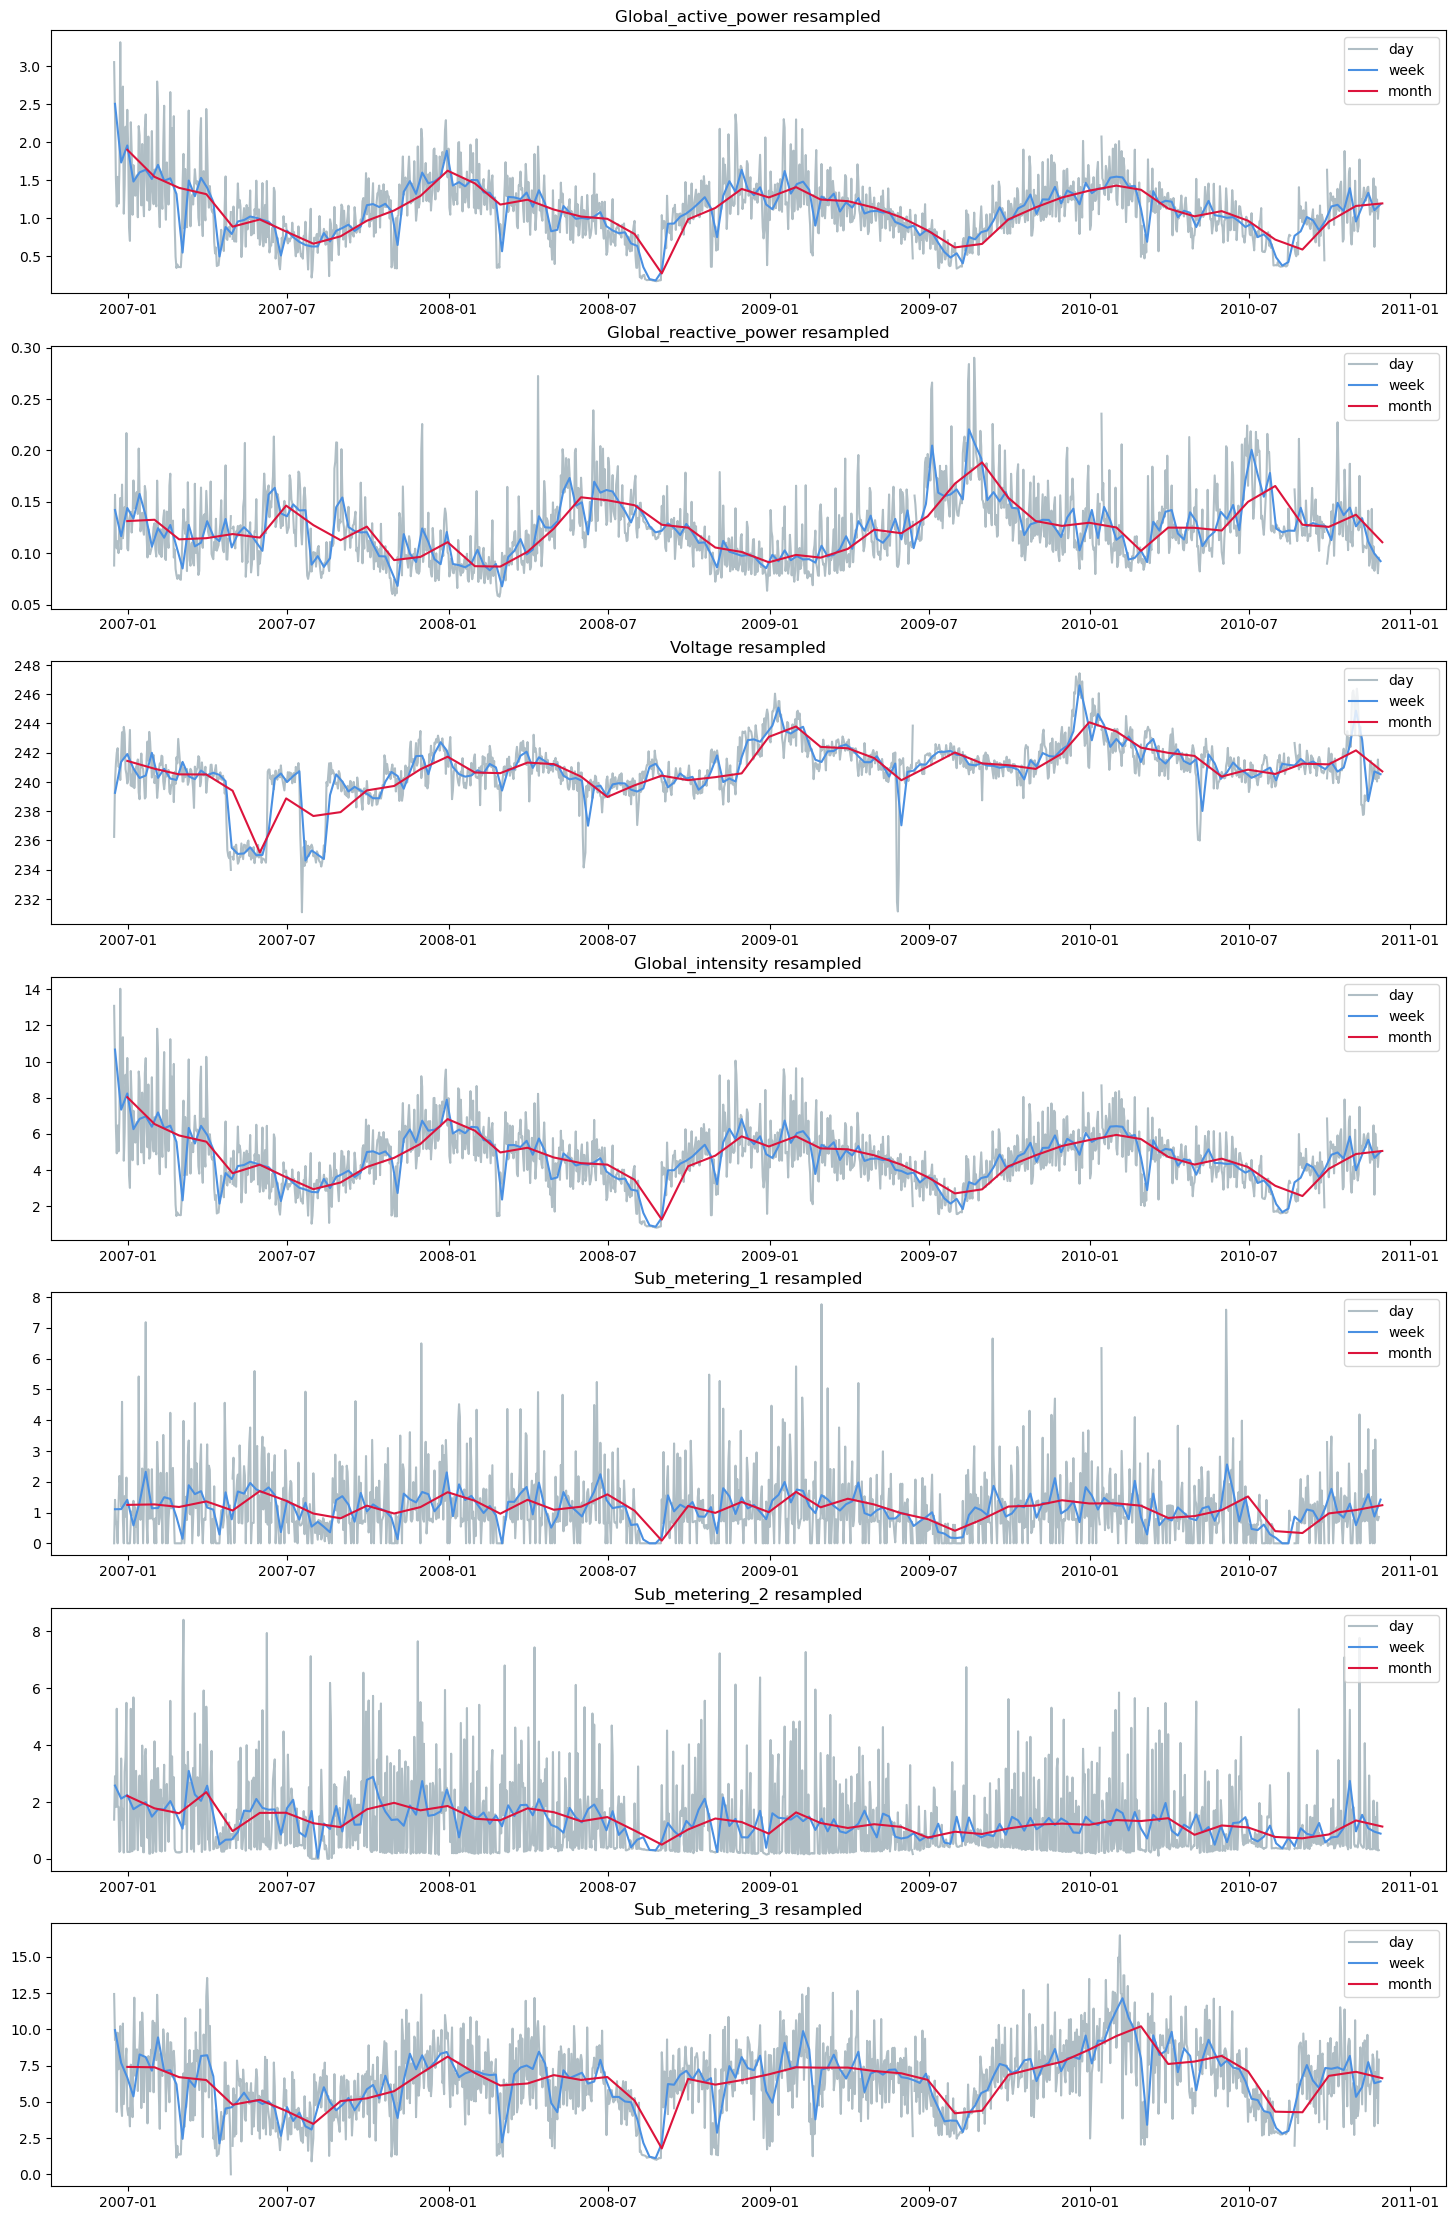

In [39]:
fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(18, 28))
axes = 0
for axes, column in enumerate(dataset.columns):
    ax[axes].plot(dtemp_rdm.index, dtemp_rdm[column], color='#B0BEC5', label="day")
    ax[axes].plot(dtemp_rwm.index, dtemp_rwm[column], color='#4A90E2', label="week")
    ax[axes].plot(dtemp_rmm.index, dtemp_rmm[column], color='#DC143C', label="month")
    ax[axes].set_title(column+" resampled")
    ax[axes].legend(loc=1)